TOC

- [Prep for EDA](#1)
    - [Import libraries](#1.1)
    - [Import data and get ready](#1.2)
- [EDA](#2)
    - [Individual feature exploring](#2.1)
        - [Target feature: Survived](#2.1.1)
            - [Observations](#2.1.1.1)
        - [Ordinal feature: Pclass](#2.1.2)
            - [Observations](#2.1.2.1)
        - [Categorical feature: Sex](#2.1.3)
            - [Observations](#2.1.3.1)
        - [Categorical feature: Embarked](#2.1.4)
            - [Observations](#2.1.4.1)
        - [Continuous numerical feature: Fare](#2.1.5)
            - [Observations](#2.1.5.1)
        - [Discrete feature: Parch](#2.1.6)
            - [Observations](#2.1.6.1)
        - [Discrete feature: SibSp](#2.1.7)
            - [Observations](#2.1.7.1)
- [EDA continued and data wrangling](#3)
    - [Text feature: Name](#3.1)
    - [Continuous numeric feature: Age](#3.2)
- [EDA in a nutshell](#4)

# Prep for EDA <a id="1"></a>

## Import libraries <a id="1.1"></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import data and get ready <a id="1.2"></a>

In [360]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [361]:
##concat both train and test data for consistant data cleaning
trainrow = df_train.shape[0]
testrow = df_test.shape[0]
testids = df_test['PassengerId'].copy()
trainids = df_train['PassengerId'].copy()
y = df_train['Survived'].copy()

##X: complete set with no target variable
X = pd.concat((df_train, df_test)).reset_index(drop=True)
X = X.drop('Survived', axis = 1)

##X_train: complete train set
X_train = X.iloc[:trainrow]
X_train['Survived'] = pd.Series(y)

# EDA <a id="2"></a>

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [78]:
missing_vals = X.isnull().sum().sort_values(ascending = False)
percent = ( X.isnull().sum()/X.isnull().count() ).sort_values(ascending = False)
missing_df = pd.concat([missing_vals, percent], axis = 1, keys = ["Total", "Percent"])
total_missing = missing_df[missing_df['Total'] > 0]
total_missing

,Total,Percent
Cabin,1014,0.774637
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764


## Individual feature exploring <a id="2.1"></a>

### Target feature: Survived <a id="2.1.1"></a>

In [9]:
X_train.groupby("Survived").mean().reset_index()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


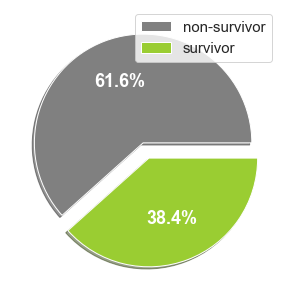

In [40]:
plt.figure(figsize = (5, 5))
labels = ['non-survivor', 'survivor']
X_train['Survived'].value_counts().plot.pie(explode = [0, 0.15],
                                            colors = ['grey', 'yellowgreen'],
                                            autopct = '%1.1f%%',
                                            shadow = True,
                                            textprops={'fontsize': 18, 'color':"w", 'weight':'bold'})
plt.title('')
plt.ylabel('')
plt.legend(labels, fontsize=15, loc="best")
plt.show()

#### Observations <a id="2.1.1.1"></a>

- the majority (61.6%) passengers in the train dataset did not survive

### Ordinal feature: Pclass <a id="2.1.2"></a>

In [41]:
X_train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [45]:
pd.crosstab(X_train.Pclass, X_train.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#### Observations <a id="2.1.2.1"></a>

- more than half of total passengers on board bought 3rd class tickets (55%)
- the majority of passengers with 3rd class tickets did not survive (76%)
- not surprisingly, the majority of 1st class passengers survived (63%)
- **assumption**: important feature

### Catagorical feature: Sex <a id="2.1.3"></a>

In [47]:
X_train[['Survived', 'Sex']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [48]:
pd.crosstab(X_train.Sex, X_train.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [49]:
pd.crosstab([X_train.Sex, X_train.Survived], X_train.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

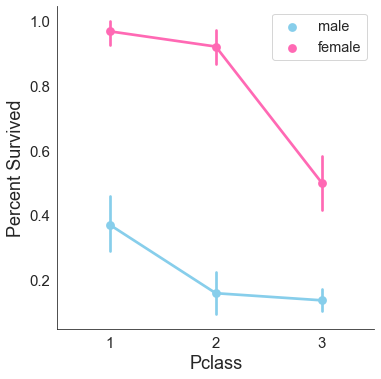

In [65]:
palette = sns.color_palette(["skyblue", "hotpink"])
sns.factorplot('Pclass','Survived',
               hue='Sex',
               palette=palette,
               legend=False,
               data=X_train)
plt.legend(fontsize='x-large')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Pclass', fontsize=18)
plt.ylabel('Percent Survived', fontsize=18)
plt.show()

#### Observations <a id="2.1.3.1"></a>

- female had higher chance at survival than male (74% vs. 19%)
- independent of Pclass, women had higher survival rate
    - survival rate for men is low even for people with 1st class tickets
- ~97% women with 1st class tickets survived
- **assumption**: important feature

### Catagorical feature: Embarked <a id="2.1.4"></a>

In [66]:
X_train[['Survived', 'Embarked']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [68]:
pd.crosstab([X_train.Embarked, X_train.Pclass], X_train.Survived,margins=True)

Survived           0    1  All
Embarked Pclass               
C        1        26   59   85
         2         8    9   17
         3        41   25   66
Q        1         1    1    2
         2         1    2    3
         3        45   27   72
S        1        53   74  127
         2        88   76  164
         3       286   67  353
All              549  340  889

In [69]:
pd.crosstab([X_train.Embarked, X_train.Pclass], [X_train.Survived, X_train.Sex],margins=True)

Survived             0           1       All
Sex             female male female male     
Embarked Pclass                             
C        1           1   25     42   17   85
         2           0    8      7    2   17
         3           8   33     15   10   66
Q        1           0    1      1    0    2
         2           0    1      2    0    3
         3           9   36     24    3   72
S        1           2   51     46   28  127
         2           6   82     61   15  164
         3          55  231     33   34  353
All                 81  468    231  109  889

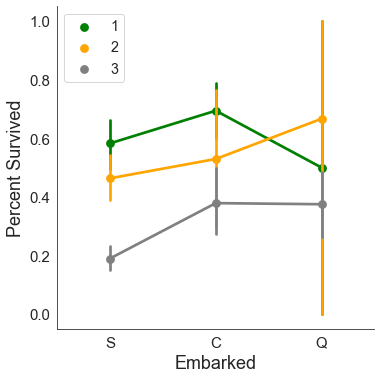

In [75]:
palette = sns.color_palette(["green", "orange", 'grey'])
sns.factorplot('Embarked','Survived',
               hue='Pclass',
               palette=palette,
               legend=False,
               data=X_train)
plt.legend(fontsize='x-large')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Embarked', fontsize=18)
plt.ylabel('Percent Survived', fontsize=18)
plt.show()

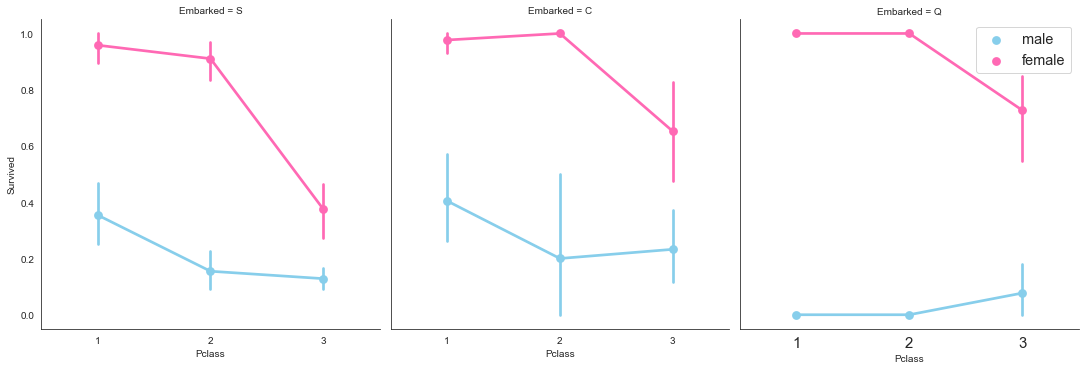

In [77]:
palette = sns.color_palette(["skyblue", 'hotpink'])
sns.factorplot('Pclass','Survived',
               hue='Sex',
               col = 'Embarked',
               palette=palette,
               legend=False,
               data=X_train)
plt.legend(fontsize='x-large')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations <a id="2.1.4.1"></a>

- majority of passengers were boarded from S (72%), followed by C (19%) and Q (9%)
- **S**: 55% 3rd class; **C**: 51% 1st class; **Q**: 94% 3rd class
- 59% 1st class passengers and 72% 3rd class passengers were boarded from S
- passengers boarded from C had the highest survival rate (55%)
- independent of social status, women had higher survival rate
- **assumption**: important feature

### Continuous numerical feature: Fare <a id="2.1.5"></a>

In [82]:
X_train[['Survived', 'Fare']].groupby(['Survived'], as_index=False).median().sort_values(by='Survived', ascending=False)

,Survived,Fare
1,1,26.0
0,0,10.5


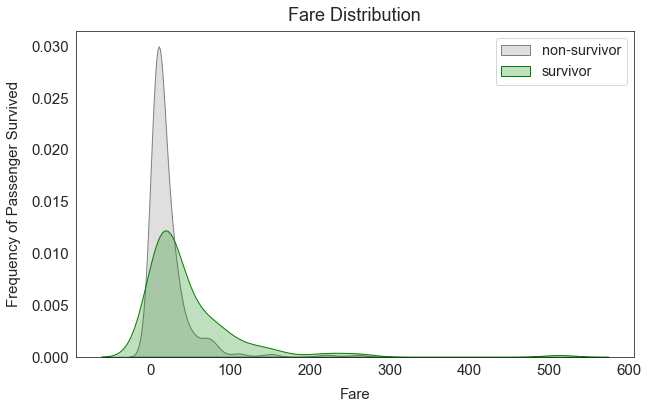

In [89]:
fig = plt.figure(figsize = (10,6))
ax=sns.kdeplot(X_train.loc[(X_train['Survived'] == 0),'Fare'] , color = 'gray', shade= True,label = 'non-survivor')
ax=sns.kdeplot(X_train.loc[(X_train['Survived'] == 1),'Fare'] , color = 'green', shade= True, label = 'survivor')
plt.title('Fare Distribution', fontsize = 18, pad = 10)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 10)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize='x-large')
plt.xlabel("Fare", fontsize = 15, labelpad = 10);

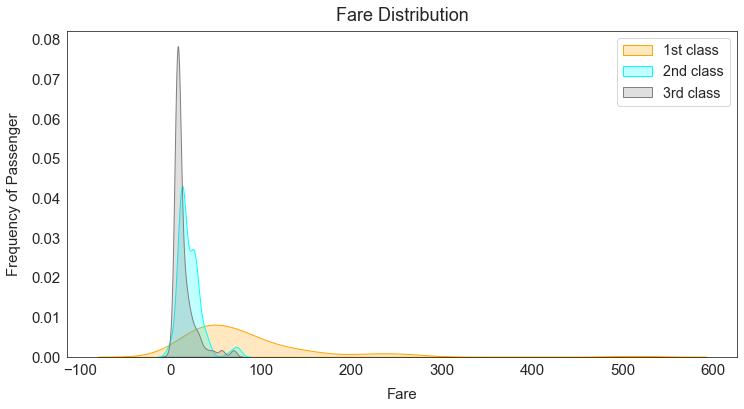

In [94]:
fig = plt.figure(figsize = (12,6))
ax=sns.kdeplot(X_train.loc[(X_train['Pclass'] == 1),'Fare'] , color = 'orange', shade= True,label = '1st class')
ax=sns.kdeplot(X_train.loc[(X_train['Pclass'] == 2),'Fare'] , color = 'cyan', shade= True, label = '2nd class')
ax=sns.kdeplot(X_train.loc[(X_train['Pclass'] == 3),'Fare'] , color = 'grey', shade= True, label = '3rd class')
plt.title('Fare Distribution', fontsize = 18, pad = 10)
plt.ylabel("Frequency of Passenger", fontsize = 15, labelpad = 10)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize='x-large')
plt.xlabel("Fare", fontsize = 15, labelpad = 10);

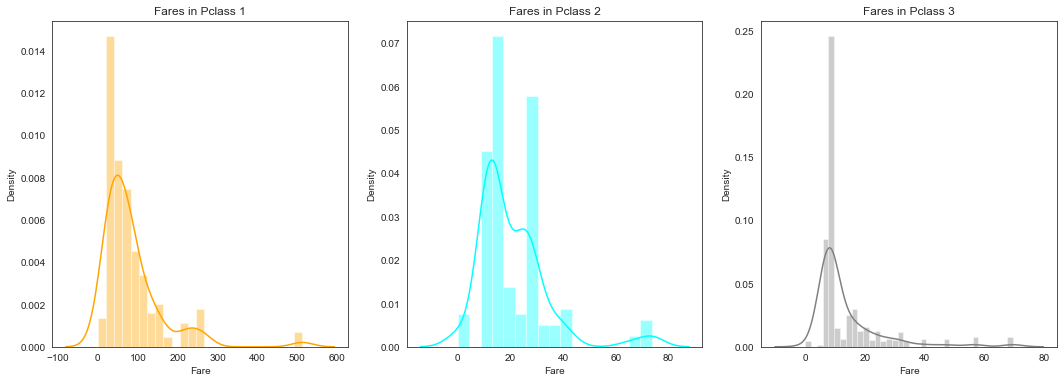

In [98]:
f,ax=plt.subplots(1,3,figsize=(18,6))
sns.distplot(X_train[X_train['Pclass']==1].Fare, color='orange', ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(X_train[X_train['Pclass']==2].Fare, color='cyan', ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(X_train[X_train['Pclass']==3].Fare, color='grey', ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

#### Observations <a id="2.1.5.1"></a>

- passengers survived paid on average 2.6 times more on Fare than who didn't survive
- potential outliers in Pclass1 group
- **assumption**: might be an important feature, but can have multicollinearity issue

### Discrete feature: Parch <a id="2.1.6"></a>

In [102]:
X_train[['Survived', 'Parch']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [104]:
pd.crosstab([X_train.Parch, X_train.Survived], X_train.Pclass,margins=True)

Pclass            1    2    3  All
Parch Survived                    
0     0          64   86  295  445
      1          99   48   86  233
1     0          10    8   35   53
      1          21   24   20   65
2     0           5    3   32   40
      1          16   13   11   40
3     0           0    0    2    2
      1           0    2    1    3
4     0           1    0    3    4
5     0           0    0    4    4
      1           0    0    1    1
6     0           0    0    1    1
All             216  184  491  891

In [111]:
pd.crosstab([X_train.Parch, X_train.Pclass], X_train.Sex,margins=True)

Sex           female  male  All
Parch Pclass                   
0     1           64    99  163
      2           45    89  134
      3           85   296  381
1     1           17    14   31
      2           18    14   32
      3           25    30   55
2     1           13     8   21
      2           11     5   16
      3           25    18   43
3     2            2     0    2
      3            2     1    3
4     1            0     1    1
      3            2     1    3
5     3            4     1    5
6     3            1     0    1
All              314   577  891

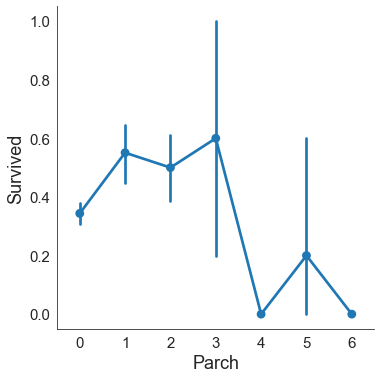

In [109]:
sns.factorplot('Parch','Survived',
               #hue='Sex',
               data=X_train)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Parch', fontsize=18)
plt.ylabel('Survived', fontsize=18)
plt.show()

#### Observations <a id="2.1.6.1"></a>

- 84% male, 62% female passengers traveled alone
- passengers traveled with small-size family [1,2,3] had the highest survival rate
- **assumption**: can be important; might want to bin [is_alone], [small_family], [large_family]

### Discrete feature: SibSp <a id="2.1.7"></a>

In [112]:
X_train[['Survived', 'SibSp']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [115]:
pd.crosstab(X_train.SibSp, X_train.Pclass,margins=True)

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


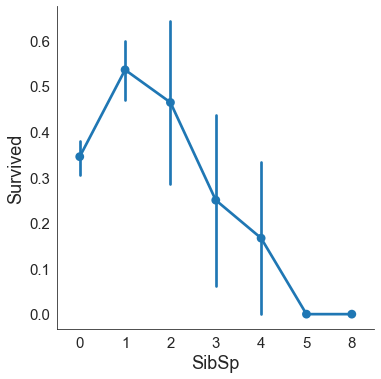

In [113]:
sns.factorplot('SibSp','Survived',
               #hue='Sex',
               data=X_train)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('SibSp', fontsize=18)
plt.ylabel('Survived', fontsize=18)
plt.show()

#### Observations <a id="2.1.7.1"></a>

- passengers traveled with many SibSps were all 3rd class, so the low survival rate is probably not due to the number of siblings
- **assumption**: I don't think this feature is very important, especially we already have the Pclass and Parch features. Drop this.

# EDA continued and data wrangling <a id="3"></a>

## Text feature: Name <a id="3.1"></a>

This is done on both test and train data, to ensure consistency.

In [276]:
X.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [362]:
X['Title'] = X.Name.apply(lambda Name: Name.split(',')[1].split('.')[0].strip())
X.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Sir               1
Dona              1
Don               1
Mme               1
the Countess      1
Capt              1
Jonkheer          1
Lady              1
Name: Title, dtype: int64

In [363]:
generalizedTitle = {
    "Mr":                 "Mr",
    "Miss":               "Miss",
    "Mrs":                "Mrs",
    "Master":             "Master",
    "Rev":                "Officer",
    "Dr" :                "Officer",
    "Col":                "Officer",
    "Major":              "Officer",
    "Ms":                 "Miss",
    "Mlle":               "Miss",
    "Lady":               "Nobility",
    "the Countess":       "Nobility",
    "Mme":                "Miss",
    "Capt":               "Officer",
    "Jonkheer":           "Nobility",
    "Dona":               "Nobility",
    "Don":                "Nobility",
    "Sir":                "Nobility"
}

In [364]:
X['genTitle'] = X.Title.map(generalizedTitle)
print(X.genTitle.value_counts())

Mr          757
Miss        265
Mrs         197
Master       61
Officer      23
Nobility      6
Name: genTitle, dtype: int64


## Continuous numeric feature: Age <a id="3.2"></a>

In [280]:
X.groupby('genTitle')['Age'].mean()

genTitle
Master       5.482642
Miss        21.834533
Mr          32.252151
Mrs         36.994118
Nobility    41.166667
Officer     46.272727
Name: Age, dtype: float64

In [281]:
print ("Age missing value in both sets: " + str((X.Age.isnull().sum()/len(X_train))*100)+str("%"))

Age missing value in both sets: 29.51739618406285%


In [365]:
## Assigning the NaN Values with the Ceil values of the mean ages
X.loc[(X.Age.isnull())&(X.genTitle=='Master'),'Age']=5.48
X.loc[(X.Age.isnull())&(X.genTitle=='Miss'),'Age']=21.83
X.loc[(X.Age.isnull())&(X.genTitle=='Mr'),'Age']=32.25
X.loc[(X.Age.isnull())&(X.genTitle=='Mrs'),'Age']=36.99
X.loc[(X.Age.isnull())&(X.genTitle=='Nobility'),'Age']=41.17
X.loc[(X.Age.isnull())&(X.genTitle=='Officer'),'Age']=46.27

In [366]:
print ("Age missing value in training set: " + str((X.Age.isnull().sum()/len(X))*100)+str("%"))

Age missing value in training set: 0.0%


In [367]:
X['Deck'] = X['Cabin']
X.Deck.fillna("N", inplace=True)
X.Deck = [i[0] for i in X.Deck]
X['Deck'].replace(['T'],['A'],inplace=True)

In [368]:
X.loc[X.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,genTitle,Deck
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,Mr,N


In [369]:
impute_value = X[(X.Pclass == 3) & 
                (X.Embarked == "S") & 
                (X.Sex == "male")].Fare.median()

In [370]:
X.Fare.fillna(impute_value, inplace=True)

In [371]:
X['family_size'] = X.SibSp + X.Parch+1

In [372]:
X['is_alone'] = [1 if i<2 else 0 for i in X.family_size]

In [373]:
X['small_fam'] = [1 if 1<i<=3 else 0 for i in X.family_size]

In [374]:
X['large_fam'] = [1 if i>3 else 0 for i in X.family_size]

At this point, I want to drop both Cabin and Deck columns and see how my models will work out.

In [375]:
X = X.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Deck', 'Title', 'family_size'], axis = 1)

In [376]:
missing_vals = X.isnull().sum().sort_values(ascending = False)
percent = ( X.isnull().sum()/X.isnull().count() ).sort_values(ascending = False)
missing_df = pd.concat([missing_vals, percent], axis = 1, keys = ["Total", "Percent"])
total_missing = missing_df[missing_df['Total'] > 0]
total_missing

,Total,Percent
Embarked,2,0.001528


In [377]:
X[X.Embarked.isnull()]

,PassengerId,Pclass,Sex,Age,Fare,Embarked,genTitle,is_alone,small_fam,large_fam
61,62,1,female,38.0,80.0,NaN,Miss,1,0,0
829,830,1,female,62.0,80.0,NaN,Mrs,1,0,0


Since the majority of passengers with 1st class tickets boarded from S, I'll replace this with S.

In [378]:
X.Embarked.fillna("S", inplace=True)

In [379]:
X['Sex'].replace(['male','female'],[0,1],inplace=True)

In [380]:
def age_bin(age):
    a = ''
    if age <= 1:
        a = 0
    elif age <= 16: 
        a = 1
    elif age <= 32:
        a = 2
    elif age <= 48:
        a = 3
    elif age <= 64:
        a = 4
    else:
        a = 5
    return a

In [381]:
X['age_group'] = X['Age'].map(age_bin)

In [382]:
X['Fare_bin']=pd.qcut(X['Fare'],4)

In [383]:
def fare_bin(fare):
    a = ''
    if fare <= 7.896:
        a = 0
    elif fare <= 14.454: 
        a = 1
    elif fare <= 31.275:
        a = 2
    else:
        a = 3
    return a

In [384]:
X['fare_group'] = X['Fare'].map(fare_bin)

In [385]:
X = X.drop(['Age', 'Fare', 'Fare_bin'], axis = 1)

In [386]:
X['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

In [387]:
X['genTitle'].replace(['Master', 'Miss', 'Mr', 'Mrs', 'Nobility', 'Officer'], [0, 1, 2, 3, 4, 5], inplace=True)

In [388]:
X.head()

,PassengerId,Pclass,Sex,Embarked,genTitle,is_alone,small_fam,large_fam,age_group,fare_group
0,1,3,0,0,2,0,1,0,2,0
1,2,1,1,1,3,0,1,0,3,3
2,3,3,1,0,1,1,0,0,2,1
3,4,1,1,0,3,0,1,0,3,3
4,5,3,0,0,2,1,0,0,3,1


In [389]:
##split back
X_train = X.iloc[:trainrow]
X_train['Survived'] = pd.Series(y)
df_test = X.iloc[trainrow:]

In [390]:
df_test.shape

(418, 10)

In [391]:
X_train.shape

(891, 11)

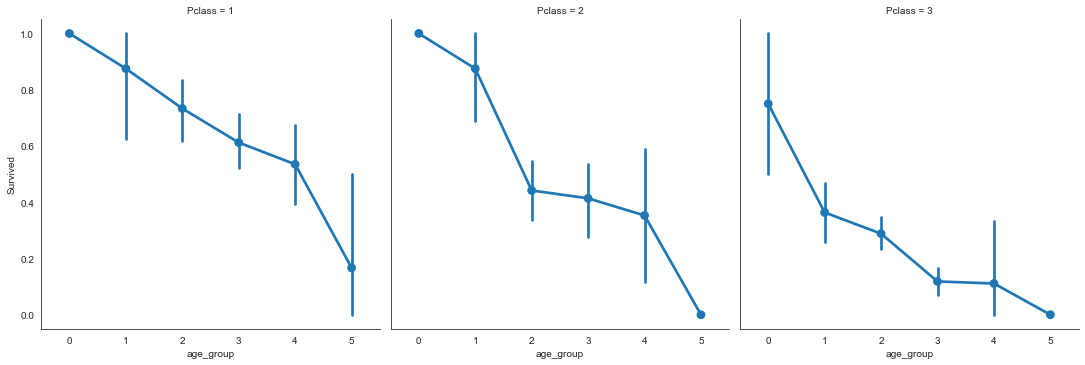

In [357]:
sns.factorplot('age_group','Survived',data=X_train, col='Pclass')
plt.show()

In [392]:
df_test.to_csv('./data/test_final.csv', index=False)
X_train.to_csv('./data/train_final.csv', index=False)

# EDA in a nutshell <a id="4"></a>

- **Pclass/Cabin/Embarked**: 
    - Being a 1st class passenger gives a higher chance of survival, regardless of which deck/cabin, especially if you are a female;
    - I tried a few things to impute missing values under Cabin feature, because the location of Cabins can have some indication of how close they were to the life boats? But then I realized that 1st class passengers were in Cabin from A-E, and their survival rate is very similar. I decided that the imputation might not be better than just simply drop the feature.
- **Name**:
    - I extracted the title from name feature.
- **Sex**: Female passengers have higher chance to survive than male, regardless of Pclass;
- **Age**: I binned age into groups.
- **SibSp/Parch**: Traveling alone gives less than 40% chance of survival. Traveling with a small-size family (less than 4 people in total) increases survival rate, and with a large-size family decreases the rate.
- **Ticket**: Feature dropped.
- **Fare**: I binned fare into groups using `pd.qcut`. I got the idea from [here](https://www.kaggle.com/ash316/eda-to-prediction-dietanic#Part3:-Predictive-Modeling).

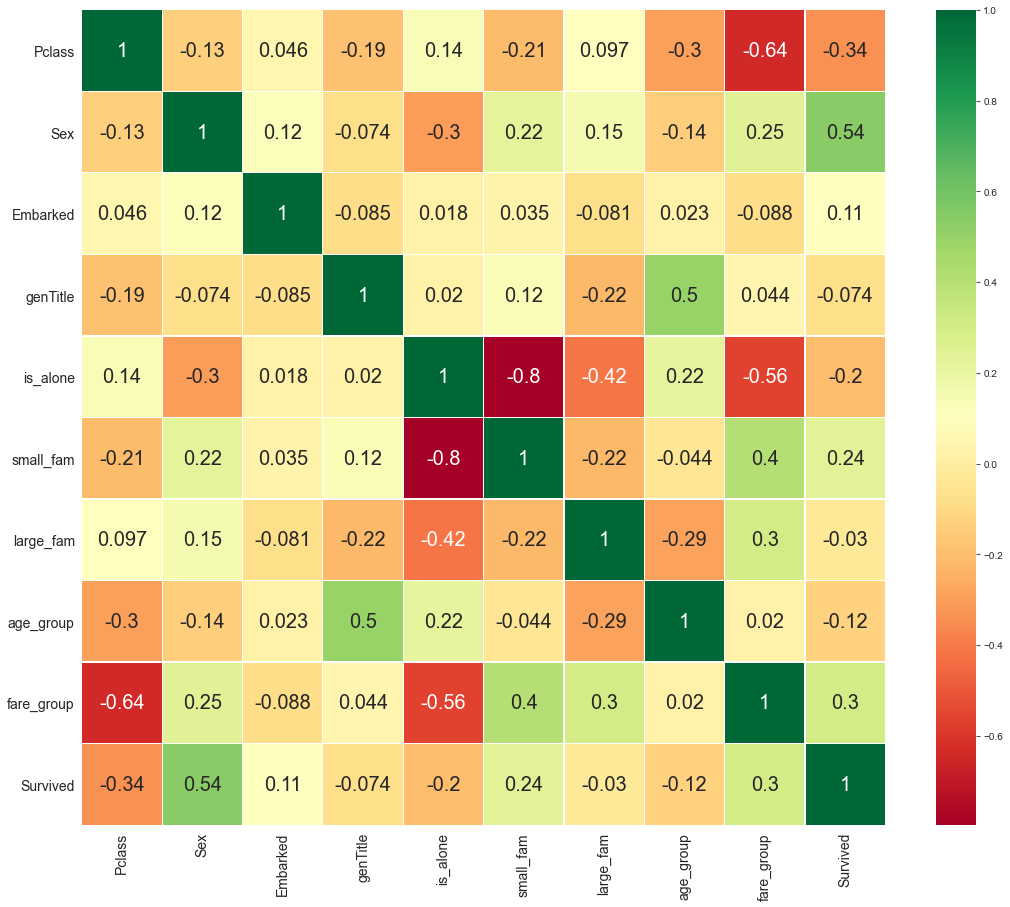

In [358]:
sns.heatmap(X_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()